# JSC270S - Tutorial \#1 : Hiring algorithms

## Profs. F. Chevalier and N. Taback


## Date: January 16, 2019
## Time: 12:00 - 14:00
## Location: BA 3175


****
## Instructions

- Make a copy of this notebook.

- The notebook should be named: jsc270_tut1_answers_lastname_studentnumber, where "lastname" is your last name, and "studentnumber" is your UofT student number.

- Answer the questions in the cells that indicate where your answers should be placed. Leave the initial comment in the code cell and heading (indicated by `# Answer for qustion XX`).  For example, place your code for Question 1 in the code cell with comment `# Enter your answer for Question 1 into this cell` (remember not to delete this comment).

- Make sure that you explain your solutions when asked and comment your code. 

- Commit and push changes to the Github classroom repository that we has been provided (more details below).


### What should be submitted?

- A *Jupyter notebook* using Python that contains all the data analyses. Make sure to comment your code in the code cells.

- Additional files that your notebook requires to compile properly (e.g. a data file).

- A pdf of your Jupyter notebook exported as a pdf file.  This can be done using [`nbconvert`](https://nbconvert.readthedocs.io/en/latest/install.html).


### When should it be submitted?

*This tutorial consists of a 2-step submission as follows:*

- **At the end of the tutorial (in-lab tutorial assignment)**: Commit and push your notebook to the Github classroom repository that contains your answers (i.e., the file named: jsc270_tut1_answers_lastname_studentnumber.ipynb) before 14:10 on the day of the tutorial, January 16.

- In between January 16, 14:10 p.m. and January 21, 11:30 you should commit and push your answer notebook as you work on the assignment during the week. Commiting and pushing often is good practice (and as a bonus you will have a backup and be able to revisit previous version).

- [`nbdime`](https://nbdime.readthedocs.io/en/latest/) is a Python package that allows you (and the teaching team) to the changes you have made to your assignment. 

- **Homework (tutorial assignment completion)**: Push your completed tutorial by 11:30, Monday, January 21.  Your last commit closest to 11:30 will be considered your final assignment.

### Where should the assignment be submitted?

Push your finished notebook and any other files on Github, through the following link: [https://classroom.github.com/a/VSn3JxaH](https://classroom.github.com/a/VSn3JxaH)

Upload the pdf of your answer notebook to the JSC270 course page on Quercus.

***

## Tutorial Grading

Tutorials will be graded according to the following marking scheme.

<table>
  <tr>
    <th></th>
    <th>Marks</th>
  </tr>
  <tr>
    <td>Tutorial Participation</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Attendance for entire tutorial</td>
    <td>5</td>
  </tr>
  <tr>
    <td>In-lab tutorial assignment</td>
    <td>20</td>
  </tr>
  <tr>
    <td>Tutorial assignment completion</td>
    <td>20</td>
  </tr>
</table>


### Grading Rubric for Tutorial Assignments

Tutorial grading rubric is available [here](https://jsc270.github.io/tut_docs.html#tutorial_grading).


***

## Tutorial objectives
The goal of this tutorial is to design appropriate selection criteria to filter data and reflect on the implications of the solution in the context of a real-world scenario. In this tutorial, you will practice table manipulations, as well as synthetic data generation. More specifically, we will cover the following in this tutorial: 

* Read from, and write to a csv file 
* Use python to extract data entries that satify given criteria
* Use python to create numerical and visual summaries 
* Create statistically meaningful solutions to selection
* Generate a synthetic dataset from given probability distribution functions
* Reflect on implications of automated methods to data selection

<br>

# Fill in your name and student number in this cell

<h2 id="first"> <mark> First Name: Haoda </mark> </h2>

<h2 id="last"> <mark> Last Name: Li</mark> </h2>

<br>

<h2 id="stnum"> <mark> Student Number: 1003918335 </mark> </h2>

***
# An algorithm to select the most promising candidates

Imagine you are working for Moogle, a well-known tech company that receives tens of thousands of job applications from graduating seniors every year. Since the company receives too many job applications for Human Resources (HR) to individually assess in a reasonable amount of time, you are asked to create a program that algorithmically analyzes applications and selects the ones most worth passing onto HR.

Since it’s difficult to create these first-pass cuts, Moogle designs their application forms to get some numerical data about their applicants’ education in Computer Science specifically and stores this information in a large [comma-separated value (csv) file](https://en.wikipedia.org/wiki/Comma-separated_values).


### Applicant data

Applicants to a developer position must enter the grades they received in 6 core Computer Science (CS) courses, as well as their overall GPA.  
For example, a student who received the following grades...

> __Intro to CS__: 100  
> __Data Structures__: 95  
> __Software Engineering__: 80  
> __Algorithms__: 89  
> __Computer Organization__: 91  
> __Operating Systems__: 75  
> __Overall GPA__: 83

will appear in the csv file as follows: `cs0001, 100, 95, 80, 89, 91, 75, 83`, where the first index (or attribute), `csc0001` corresponds to the applicant id automatically generated by the system.

The data for 5000 applicants is available in a .csv format, at [CS-apps.csv](CS-apps.csv).

***
## Part 1 - Selecting the best applicants
***

### Loading data from a file

There are several options to choose from to load data from a csv file into a Python data structure. We list two common approaches here:

*Option 1:* Use the python csv library.  
See the documentation on how to read and write csv files using this library [here](https://docs.python.org/3/library/csv.html). A starter code is provided below. 

Here is an example of a basic .csv file:

In [1]:
# !less data.csv

The code below is an example of how you can read data from the `data.csv` file using the python csv library, and display the first and last indexes of each row.

In [2]:
# import csv
# with open('data.csv', 'r') as csvfile:
#      datareader = csv.reader(csvfile, delimiter=',')
#      for row in datareader:
#          print(row[0], row[3]) #or row[-1] for the last index

*Option 2:* Another option (recommended for this tutorial) is to use the built-in csv reader of pandas (see [pandas documentation](https://pandas.pydata.org/) ).

<br>

**$\Diamond$ Question 1:** Read the csv file [`CS-apps.csv`](CS-apps.csv) into Python.

In [3]:
import pandas as pd
df = pd.read_csv('CS-apps.csv')

### Write Python code to select the most promising candidates

**$\Diamond$ Question 2.a:** Select applicants whose overall GPA is at least 85.  

In [4]:
gpa_cut = df.loc[df['GPA'] >= 85]

**$\Diamond$ Question 2.b:** Select applicants who have no grade below 65.  

In [5]:
min_cut = df.loc[df.iloc[:, 1:7].min(axis = 1) >= 65]

**$\Diamond$ Question 2.c:** Select applicants who have at least 4 grades strictly above 85.  

In [6]:
# Enter your answer for Question 2.c into this cell
import numpy as np
courses = list(df.columns[1:7])

def check_85(row):
    return sum(row[courses] > 85) >= 4

four_course_cut = df.loc[df.apply(check_85, axis=1)]

**$\Diamond$ Question 2.d:** Select applicants who have an average of CS grades strictly above 75.

In [7]:
# Enter your answer for Question 2.d into this cell
def check_average(row):
    return row[courses].mean() > 75

ave_cut = df.loc[df.apply(check_average, axis=1)]

**$\Diamond$ Question 3:** For each of the above algorithms, answer the following questions:
* The criteria in questions 2.a - 2.d define the "cut".  How many applicants made the cut?  What percentage of the application pool made the cut?
* Were applicants 'cs0270' and 'cs2537' selected?
* Explain your answer in a few sentences.

In [8]:
# Code cell for question 3

def summary_cuts(cuts, df):
    selected = cuts[0]
    for i in range(1,len(cuts)):
        selected = selected.merge(cuts[i]) 
    cuts.append(selected)
    
    # cut numbers
    cut_number = [len(cut) for cut in cuts]
    print(cut_number)

    # cut percentage
    cut_average = [number / len(df) * 100 for number in cut_number]
    print(cut_average)

summary_cuts([gpa_cut, min_cut, four_course_cut, ave_cut], df)

# selected applicants
applicants_in = [((cut.ID == 'cs0270').any(), (cut.ID == 'cs2537').any()) 
                 for cut in [gpa_cut, min_cut, four_course_cut, ave_cut]]
print(applicants_in)
print(all(i[0] for i in applicants_in), all(i[1] for i in applicants_in))


[1990, 2935, 892, 4695, 259]
[39.800000000000004, 58.699999999999996, 17.84, 93.89999999999999, 5.18]
[(False, False), (True, False), (False, False), (True, True)]
False False


# Answer for question 3

- For the number of applicants made the cut
 - 1990 applicants made the 2.a cut (overall GPA is at least 85), the percentage is 39.8%. 
 - 2935 applicants made the 2.b cut (no grade below 65), the percentage is 58.7%.
 - 892 applicants made the 2.c cut (at least 4 grades strictly above 85), the percentage is 17.8%.
 - 4695 applicants made the 2.d cut (an average of CS grades strictly above 75), the percentage is 93.9%.
 - 259 applicants made all the cuts, the percentage is 5.18%
- Applicant 'cs0270' is selected in 2.b, 2.c cuts, applicant 'cs2537' is selected in 2.d cut. Both of them do not pass all the cuts. 

### Are we doing things right?  — Creating numerical and visual summaries of the data

The above algorithms are pretty naive. Let's see if we can do better. First, let's have a look at what our data looks like. To do so, we are going to analyse our data more closely.  

*Visual summaries*: Visualize distributions of grades using [matplotlib](https://matplotlib.org/).

**$\Diamond$ Question 4.a:** Plot the distribution of grades in the "Intro to CS" course. What do you observe?  

Text(0.5, 1.0, 'Histgram of Intro to CS grades')

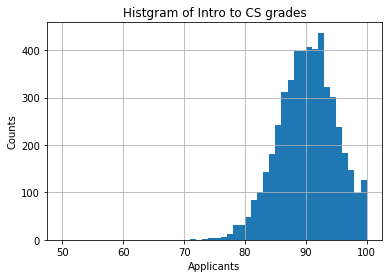

In [28]:
#code for 4.a.
ax = df['Intro to CS'].hist(bins=range(50, 101, 1))
ax.set_xlabel('Applicants')
ax.set_ylabel('Counts')
ax.set_title('Histgram of Intro to CS grades')

# Answer for question 4.a 

- The plot is likely to follow a normal distribution. 
- The mean is around 90, most of the grades fall in the range of 80-100. 

**$\Diamond$ Question 4.b:** Plot the distribution of grades in the "Operating systems" course. What do you observe?  

Text(0.5, 1.0, 'Histgram of Operative systems grades')

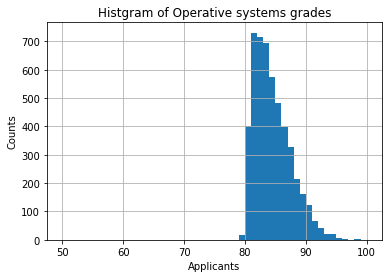

In [10]:
# code for 4.b.
ax = df['Operative systems'].hist(bins=range(50, 101, 1))
ax.set_xlabel('Applicants')
ax.set_ylabel('Counts')
ax.set_title('Histgram of Operative systems grades')

# Answer for question 4.b.
- The distribution is right-skewed
- The plots is likely to follow a skewed normal distribution, 
- Most of the grades are higher than 80, the mean is around 83, and the standard deviation is small compared to other plots. 

**$\Diamond$ Question 4.c:** Repeat 4.b. for the remaining courses. What can you conclude?

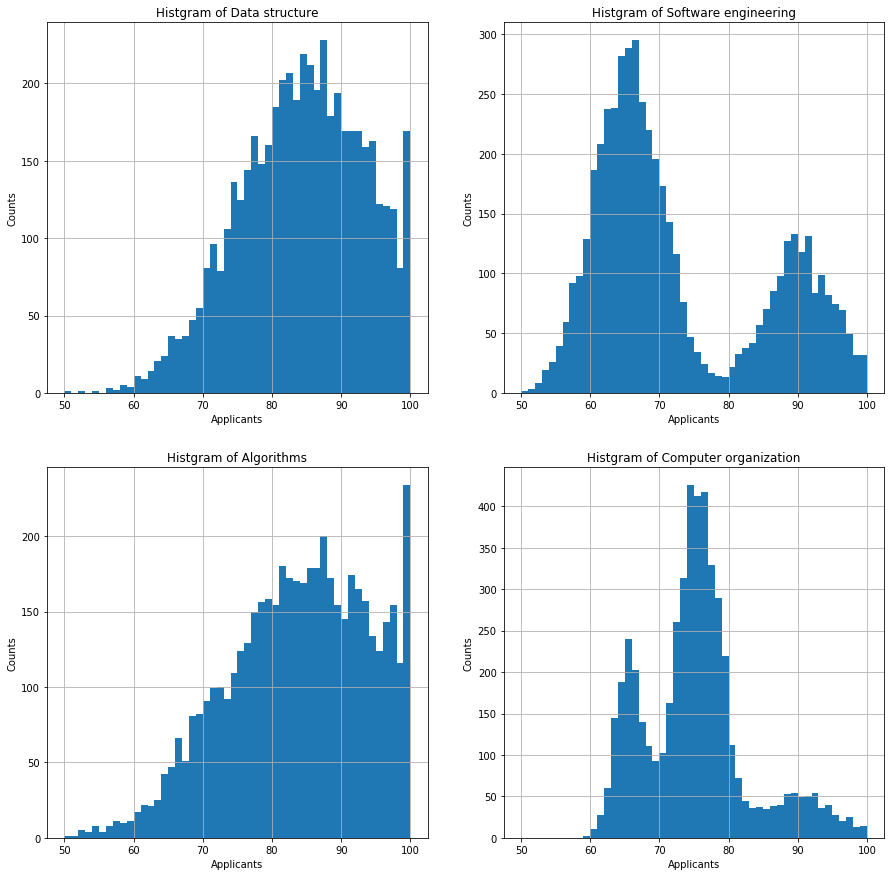

In [11]:
# code for 4.c.
import matplotlib.pyplot as plt
courses = ['Data structure', 'Software engineering', 'Algorithms', 
           'Computer organization']
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(15,15))
for i in range(0, 4):
    df[courses[i]].hist(ax=axes[i//2, i%2], bins=range(50, 101, 1))
    axes[i//2, i%2].set_xlabel('Applicants')
    axes[i//2, i%2].set_ylabel('Counts')
    axes[i//2, i%2].set_title('Histgram of '+courses[i])

# Answer for question 4.c.

- There is a strong correlation between Data Structure grades and Algorithm grades, both of them may follow a normal distribution with mean around 85 and with a similar stand deviation. 
- The grades of Software engineering is likely to follow a mixture distribution. Around 60-70% applicants get a grade in the range 50-80 and the rest applicants have grade between 80 and 100. Both groups are likely to follow normal distribution, with the mean 65 for the majority of applicants, and the mean 90 for the rest of applicants. 
- The grades of Computer organization is likely to follow a mixture distribution. It can be divided into three groups. Most applicants (70%) are likely to follow a normal distribution with mean around 75 and with a small stand deviation; 20% applicants are likely to follow a normal distribution with mean around 65 and with a small deviation, the rest 10% applicants are likely to follow a normal distribution with mean around 90 and with a larger standard deviation.

*Numerical summaries*: Calculate simple statistics.

* See documentatation for `pandas` [descriptive statistics functions](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)
* See documentation for `numpy` [descriptive statistics functions](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html#averages-and-variances)

**$\Diamond$ Question 5.a:** Using the pandas method [`describe`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html), generate statistical summaries for each course.  

In [12]:
# enter code for question 5.a.
for course in courses:
    print(df[course].describe())
    print('\n')

count    5000.000000
mean       83.808800
std         8.895531
min        50.000000
25%        78.000000
50%        84.000000
75%        91.000000
max       100.000000
Name: Data structure, dtype: float64


count    5000.000000
mean       72.315000
std        12.336799
min        50.000000
25%        63.000000
50%        68.000000
75%        85.000000
max       100.000000
Name: Software engineering, dtype: float64


count    5000.000000
mean       83.333000
std        10.110636
min        50.000000
25%        76.000000
50%        84.000000
75%        91.000000
max       100.000000
Name: Algorithms, dtype: float64


count    5000.000000
mean       74.726400
std         7.689822
min        59.000000
25%        70.000000
50%        75.000000
75%        78.000000
max       100.000000
Name: Computer organization, dtype: float64




**$\Diamond$ Question 5.b:** Generate the `min`, `max`, `mean`, `std`, `lower quartile`, `second quartile (median)`, `upper quartile`, `top 10% percentile` values for "Operating systems" and "Overall GPA". For this question, you must use the dedicated function for each value (i.e., don't use `describe`). 

In [13]:
# enter code for question 5.b.
my_describe = {'name': [], 'min':[], 'max':[], 'mean':[], 'std':[], 
               'lower quartile': [], 'median':[], 'upper quartile': [], 
               'top 10% percentile':[]}
for course in ['Operative systems', 'GPA']:
    my_describe['name'].append(course)
    my_describe['min'].append(df[course].min())
    my_describe['max'].append(df[course].max())
    my_describe['mean'].append(df[course].mean())
    my_describe['std'].append(df[course].std())
    my_describe['lower quartile'].append(df[course].quantile(0.25))
    my_describe['median'].append(df[course].quantile(0.5))
    my_describe['upper quartile'].append(df[course].quantile(0.75))
    my_describe['top 10% percentile'].append(df[course].quantile(0.9))
df_describe = pd.DataFrame(my_describe)
df_describe

,name,min,max,mean,std,lower quartile,median,upper quartile,top 10% percentile
0,Operative systems,79,98,84.0002,3.005596,82.0,83.0,86.0,88.0
1,GPA,50,100,80.8890,10.743191,73.0,81.0,89.0,95.0


### Improved algorithm

**$\Diamond$ Question 6:** Use your data analyses in questions 4 and 5 to develop a new criteria (i.e., different from the criteria given in question 2) to select the top applicants.  Describe the reasoning behind your new criteria and why your new criteria improves the selection process.

# Answer for question 6

## Algorithm
- Select all applicants having no grades below 65 in Software engineering and Computer organization and no grades below 70 in the other courses. 
- Select all applicants having at least one grades above the top 10% quantile. 
- Select all applicants with GPA at least 85.
- Select all applicants having at least four grades above the first quartile. 

## Reasoning
- I keep 2.a cut because it is a good cut, since GPA is a good summary of the applicant's overall study.
- The old criteria is not very balanced for each cut, especially for 2.c and 2.d. The new criteria makes sure that each cut will select around half of the applicants.
- The new criteria selects applicants based on the quartiles and mean instead of hard-coded cutoff marks. The hard-coded marks are more to make sure the applicants will meet the minimum requirements. 
- The 2.c cut in the old criteria does not concern about the fact that the six courses having quite different means and distributions, there are 2 courses are much harder to get 85 compared to others. The new criteria takes consideration and uses the quartile instead of a cutoff mark. 

**$\Diamond$ Question 7:** Write a program using Python that returns a new list of worthwhile candidates.  How different is your list compared to the list using the criteria in question 2?  

In [14]:
# code for question 7

# cut 1
def check_min(row):
    for i in [1, 2, 4, 5]:
        if (row[i] < 70):
            return False
    for i in [3, 6]:
        if (row[i] < 65):
            return False
    return True

min_cut_new = df.loc[df.apply(check_min, axis=1)]

# cut 2
quantile_90 = df.quantile(0.9, 0)
def check_best(row, quantile_90):
    for i in range(0, 6):
        if (row[i + 1] > quantile_90[i]):
            return True
    return False

best_cut_new = df.loc[df.apply(check_best,args=(quantile_90, ), axis=1)]

# cut 3, same as 2.a since it is a good cut

# cut 4 
f_quantile = df.quantile(0.25, 0)
def check_mean(row, f_quantile):
    return sum(row[courses] > f_quantile[courses]) >= 4

mean_cut_new = df.loc[df.apply(check_mean, args=(f_quantile, ), axis=1)]

In [15]:
summary_cuts([min_cut_new, best_cut_new, gpa_cut, mean_cut_new], df)

[2685, 1991, 1990, 1783, 336]
[53.7, 39.82, 39.800000000000004, 35.66, 6.72]


# Answer for question 7

- The new cuts is more balanced - each cut will select 35-50% of applicants.
- Slight more number of applicants make all the cuts (new 336 vs. old 259). 

**$\Diamond$ Question 8:** Briefly describe the tradeoffs of your selection criteria versus the criteria in question 2.

# Answer for question 8

- The new criteria is based more on the ratio of selections by using percentile values. The new criteria relies more on the overall quality of the applicants instead of a absolute standard. 
- The new criteria takes more time to run, since the algorithm is more complicated.
- The new criteria does not ask for an average of the core courses.

***
## Part 2 - Generate a synthetic dataset
***

Before adopting your algorithm, HR wants to test your proposed algorithm, and compare it against a third-party solution on different, larger datasets. To do so, they ask you to write code for them to generate synthetic data with the following properties.

* **Introduction to CS:**  
  * normal distribution $N(90, 5^2)$

* **Data structures:**
  * normal distribution $N(85,10^2)$

* **Software engineering** (renowned as either you're good at it, either you're weak):
  * typically  $30\%$ of the population has strong results: normal distribution  $N(90,5^2)$ 
  * the rest is weaker: normal distribution $N(65,5^2)$ 

* **Algorithms:**
  * strong correlation with data structures, typically within the same (10 points) range

* **Computer organization:**
  * normal distribution  $N(75,15^2)$ 
  * some exceptional grades (3% of the population):  $N(95,2^2)$ 
  * some very low grades (10% of the population):  $N(60,15^2)$ 

* **Operating systems:**
  * [skew normal distribution](https://en.wikipedia.org/wiki/Skew_normal_distribution) $\alpha=10$, $\xi=80$ , $\omega=5$ 

* **GPA**
  * about half of the population is "average": normal distribution  $N(75,10^2)$  
  * the other half is "strong": normal distribution $N(90,10^2)$

### Simulate data and replicate workflow

**$\Diamond$ Question 9:** Write a program using Python to simulate grades and GPA with the above properties.  
*Advice: you are strongly encouraged to define reusable functions for this exercise.* Here is an example of a function that returns the absolute value of a number: 

```python
    def absolute(x):
        if x < 0:
            return -x
        else:
            return x
```

In [16]:
# enter code for question 9
from scipy.stats import skewnorm

def simulate():
    
    intro = np.random.normal(90, 5)
    while intro < 0 or intro > 100:
        intro = np.random.normal(90, 5)
    
    data = np.random.normal(85, 10)
    while data < 0 or data > 100:
        data = np.random.normal(85, 10)
        
    software = np.random.normal(90, 5) 
    if np.random.binomial(1, 0.3) else np.random.normal(65, 5)
    while software < 0 or software > 100:
        software = np.random.normal(90, 5) 
        if np.random.binomial(1, 0.3) else np.random.normal(65, 5)
        
    algo = data + np.random.uniform(-10, 10)
    while algo < 0 or algo > 100:
        algo = data + np.random.uniform(-10, 10)
    
    i = np.random.uniform(0, 1)
    if (i < 0.03):
        organizations = np.random.normal(95, 5)
    if (i < 0.13):
        organizations = np.random.normal(60, 15)
    else:
        organizations = np.random.normal(75, 15)
    while organizations < 0 or organizations > 100:
        i = np.random.uniform(0, 1)
        if (i < 0.03):
            organizations = np.random.normal(95, 5)
        if (i < 0.13):
            organizations = np.random.normal(60, 15)
        else:
            organizations = np.random.normal(75, 15)
    
    os = skewnorm.rvs(a=10, loc=80, scale=5)
    while os < 0 or os > 100:
        os = skewnorm.rvs(a=10, loc=80, scale=5)
        
    gpa = np.random.normal(90, 10) if np.random.binomial(1, 0.5) 
    else np.random.normal(75, 10)
    while gpa < 0 or gpa > 100:
        gpa = np.random.normal(90, 10) if np.random.binomial(1, 0.5) 
        else np.random.normal(75, 10)
        
    return [intro, data, software, os, algo, organizations, gpa]


**$\Diamond$ Question 10:** Generate a random sample of 10000 applicants, and save these grades into a new csv file, prefixing each applicant with their id (e.g. `'cs09320'`). Run the algorithms of Part 1 on this new dataset.  

In [17]:
import csv
with open('new_CS_data.csv', 'w') as csv_file:
    writer = csv.writer(csv_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(list(df.columns.values))
    for i in range(0, 10000):
        row = ['cs'+ str(i).zfill(5)]
        row.extend(simulate())
        writer.writerow(row)

In [18]:
# run the Part I algorithms 
df2 = pd.read_csv('new_CS_data.csv')

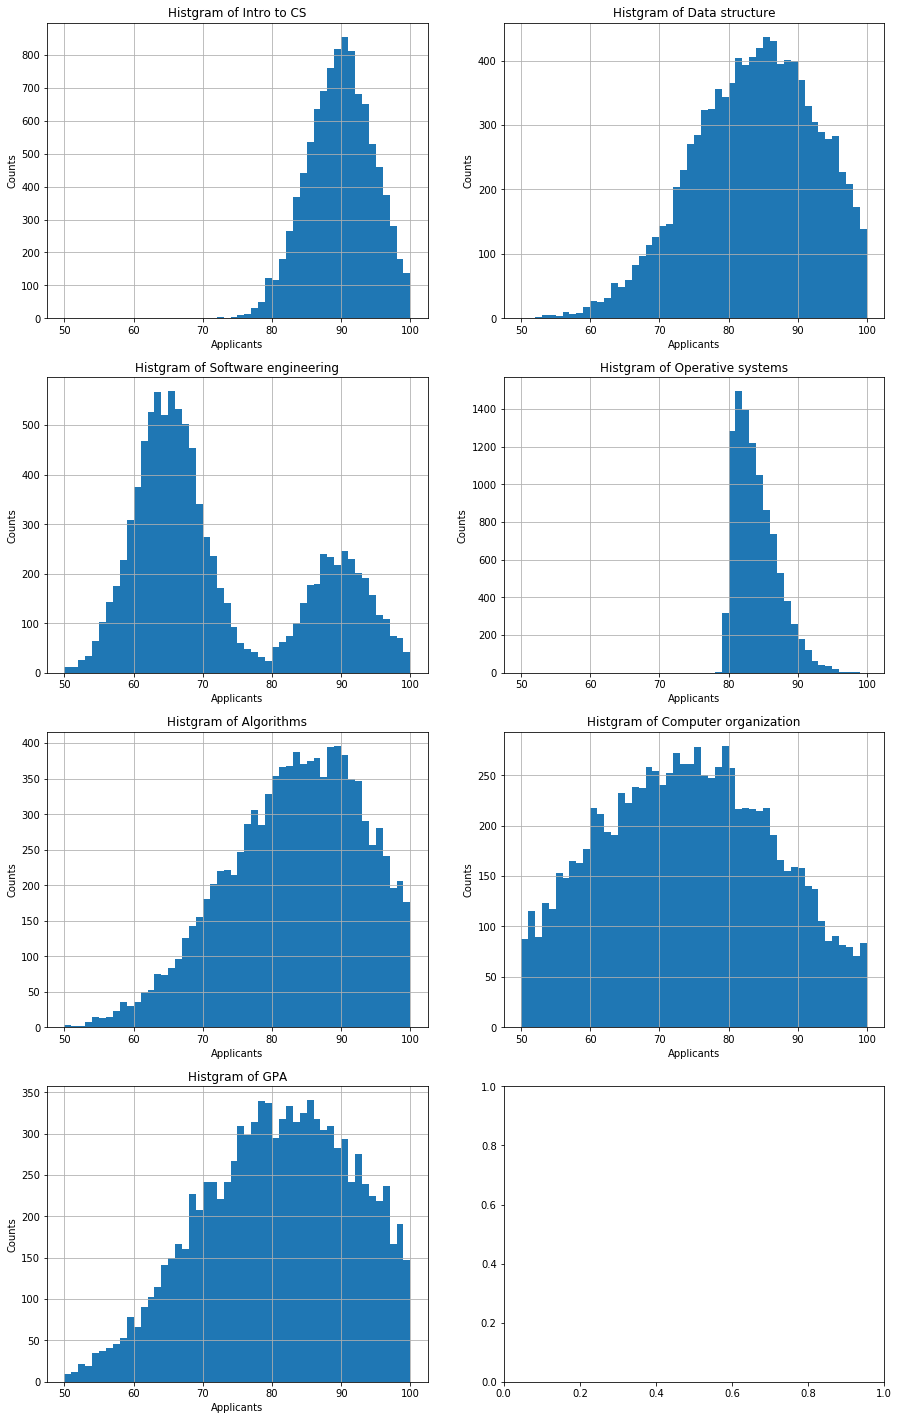

In [29]:
# plot the synthetic data
fig, axes = plt.subplots(nrows=4, ncols = 2, figsize=(15,25))
for i in range(1, 8):
    df2[df2.columns.values[i]].hist(ax=axes[(i-1)//2, (i-1)%2], 
                                    bins=range(50, 101, 1))
    axes[(i-1)//2, (i-1)%2].set_xlabel('Applicants')
    axes[(i-1)//2, (i-1)%2].set_ylabel('Counts')
    axes[(i-1)//2, (i-1)%2].set_title('Histgram of '+df2.columns.values[i])

In [20]:
# originally proposed algorithm
gpa_cut2 = df2.loc[df2['GPA'] >= 85]
min_cut2 = df2.loc[df2.iloc[:, 1:7].min(axis = 1) >= 65]
four_course_cut2 = df2.loc[df2.apply(check_85, axis=1)]
ave_cut2 = df2.loc[df2.apply(check_average, axis=1)]

summary_cuts([gpa_cut2, min_cut2, four_course_cut2, ave_cut2], df2)

[3787, 4170, 174, 6631, 55]
[37.87, 41.699999999999996, 1.7399999999999998, 66.31, 0.5499999999999999]


In [21]:
# new algorithm
min_cut_new2 = df2.loc[df2.apply(check_min, axis=1)]
quantile_90_2 = df2.quantile(0.9, 0)
best_cut_new2 = df2.loc[df2.apply(check_best,args=(quantile_90_2, ), axis=1)]
f_quantile_2 = df2.quantile(0.25, 0)
mean_cut_new2 = df2.loc[df2.apply(check_mean, args=(f_quantile_2, ), axis=1)]

summary_cuts([min_cut_new2, best_cut_new2, gpa_cut2, mean_cut_new2], df2)

[3849, 4469, 3787, 3772, 603]
[38.49, 44.690000000000005, 37.87, 37.72, 6.03]


### Limitations 
**$\Diamond$ Question 11:** Comment on the potential limitations of the above approach to generating synthetic data.

<br>
<br>

# Answer for question 11

- The generated grades are floating numbers instead of integers. 
- There is no exceptional data, we cannot test the ability that the algorithm handles exceptions and abnormal data points.
- The generated synthetic data is still based on the distributions of the original dataset, a similar result should be obtained.


*** 
## Part 3. Reflections

Now that you feel good about your algorithm, let's highlight some of those applicants and reveal the stories between them. 

> **Story 1: Misread the Instructions**  
What if an excellent applicant thinks they should put in letter grades?
>
> `[‘A’, ‘A’, ‘A’, ‘A’, ‘A’, ‘A’, ‘A’]`
>
> … or how about their grades on 4-point scale?
>
> `[4, 3.9, 4, 4, 3.95, 4, 3.9]`

> **Story 2: Bad Assumptions**  
> What if one of your applicants skipped Intro to Computer Science? When they saw your form, they froze, and decided that putting -1 in the input field would make it obvious…
>
> `[-1, 95, 99, 94, 96, 98, 95]`

> **Story 3: Mistake in the Input**  
> What if one of your applicants accidentally put in a number > 100?
>
> `[681, 68, 73, 70, 81, 91, 59]`
>
> That might seem easy enough for a program to catch, but what if they accidentally dropped a 0?
>
> `[100, 100, 100, 100, 100, 100, 10]`
>
> A person would catch that mistake easily, does your algorithm?

> **Story 4: The Awful Semester**  
> What if your applicant had a medical emergency one semester? Or a personal tragedy?
>
> `[95, 93, 50, 91, 98, 90, 90]`

> **Story 5: Inverse Trajectories**  
> What if one of your applicants came from an underprivileged background and really struggled at the beginning of college… but showed extraordinary growth by the end?
> 
> `[65, 75, 85, 95, 100, 100, 80]`
> 
> What if one of your applicants came to college with extraordinary potential? They easily aced their first few classes and then gradually grew apathetic about their education - getting nothing but barely-passing grades by the time they were a senior?
> 
> `[100, 100, 95, 85, 75, 65, 80]`
> 
> Does your algorithm treat them equally? 

<br>


**$\Diamond$ Question 12:**  For each of the above stories, reflect on whether you think that your algorithm does the right thing. If not, how could you improve it? Explain what you would change in a few sentences.   

# Answer for question 12
Story 1-3 are similar, where the applicant makes an error in uploading their marks.
- Story 1: my algorithm cannot handle this case. Since a letter will make the data frame type becomes Object, my algorithm should check each data after importing, and convert the letter grade to the numeric grade, but to the lower bound as a penalty. For grades lower than 4, I'll convert them to appropriate 100-scale by multiple 25. 
- Story 2: my algorithm cannot handle this case. I'll select all rows with one and only one -1 values and take them aside for further investigation.
- Story 3: my algorithm cannot handle this case. The check will be done along with checks in story 1, multiple grades below 10 by 10 and divide grades over 500 by 10. 

Story 4 and 5 are similar considerations.
 - Story 4 is not handled by the algorithm and will not be handled. Applicants in story 4 is likely to be influenced by cut 1 in my algorithm, but cut 1 is a minimum cut that are mandatory to all applicants, consider the huge number of applicants. 
 - Story 5 is not handled by the algorithm. To imporve, a new cut can be added, the new cut will calculate a weighted mean, where introductory level course will have a lower weight and higher grade courses will have a higher weight, in consideration of their importance and difficulties. Then, we can have a more fair considerations.

**$\Diamond$ Question 13:** Explain what precautions for writing such an automated selection algorithm should be taken in a real setting and why.

# Answer for question 13

- Even the algorithm is perfect, there are still possible special cases we cannot handle. Hence we may risk in losing some valuable applicants. 
- The automated selection will work better on quantitative data. It can be used to remove applicants that cannot make the minimum requirements. However, it may not be a good way for making the final decision. 
- For the risk of losing some valuable applicants, the automated selection process may consider keeping the exceptional data, this allows some further investigations if the selected applicants are not enough.

### Bonus Question (worth up to 2 extra points)

**$\Diamond$ Question 14:** Implement the changes to your algorithm to properly account for the different stories above. To put your solution to test, tweak the csv file manually to introduce some cases above, and make sure you take note of what participant has what story for validation.
<br>
<br>

In [22]:
# code for bonus question 

# create a new csv file for story 1-3
# function for story 1-3
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def convert(cell):
    cell = str(cell)
    letter_convert = {'A+': 90, 'A': 85, 'A-': 80, 
                      'B+': 77, 'B': 73, 'B-': 70, 
                      'C+': 67, 'C': 63, 'C-': 60, 
                      'D+': 57, 'D': 53, 'D-': 50}
    if cell[0:2] == 'cs':
        return cell
    elif isfloat(cell):
        cell = float(cell)
        if cell == -1.0:
            return -1
        elif cell <= 4:
            return int(cell*25)
        elif cell < 10:
            return int(cell*10)
        elif cell > 500:
            return int(cell//10)
        elif cell > 100 and cell < 200:
            return int(float(str(cell)[1:]))
        else:
            return int(cell)
    else:
        return letter_convert.get(cell, -1)
    
# function for strory 4-5
def weighted_ave(row):
    ave = 0
    for i in range(1, 7):
        ave += (row[i]*(0.75 + 0.1*i))/6
    return ave > 90

In [23]:
df_tweak = pd.read_csv('tweak_CS_data.csv')
# CS0098 is for Story 1 case 1
# CS0099 is for Story 1 case 2
# CS0101 is for Story 2
# CS0103 is for Story 3
df_tweak

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
0,cs0098,A,B,A+,A,A-,B,A-
1,cs0099,4,3.7,3.4,3.3,3.5,3.9,3.9
2,cs0101,-1,88,86,85,63,74,86
3,cs0102,94,900,59,83,80,74,95
4,cs0103,88,9,61,82,190,71,57


In [24]:
# Apply improvements for Story 1-3
df_tweak = df_tweak.applymap(convert)
df_tweak

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
0,cs0098,85,73,90,85,80,73,80
1,cs0099,100,92,85,82,87,97,97
2,cs0101,-1,88,86,85,63,74,86
3,cs0102,94,90,59,83,80,74,95
4,cs0103,88,90,61,82,90,71,57


In [25]:
# Take out the speical cases rows (for Story 2)
index_to_remove = [row[0] for row in df_tweak.iterrows() if -1 in list(row[1])]
df_special = df_tweak.iloc[index_to_remove]
df_tweak = df_tweak.drop(index_to_remove, axis='index')
df_tweak

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
0,cs0098,85,73,90,85,80,73,80
1,cs0099,100,92,85,82,87,97,97
3,cs0102,94,90,59,83,80,74,95
4,cs0103,88,90,61,82,90,71,57


In [26]:
df_special

,ID,Intro to CS,Data structure,Software engineering,Operative systems,Algorithms,Computer organization,GPA
2,cs0101,-1,88,86,85,63,74,86


In [27]:
# Apply improvements for Story 4-5
weight_cut = df.loc[df.apply(weighted_ave, axis=1)]
len(weight_cut)
# This is the addtional cut being added
summary_cuts([min_cut_new, best_cut_new, gpa_cut, mean_cut_new, weight_cut], df)

[2685, 1991, 1990, 1783, 2057, 316]
[53.7, 39.82, 39.800000000000004, 35.66, 41.14, 6.32]


# Answer for bonus question

- The tweaked data set contains cases for Story 1-3, CS0098 is for Story 1 case 1, CS0099 is for Story 1 case 2, CS0101 is for Story 2, CS0103 is for Story 3. Then, I convert all of them and take out all applicants with -1. All the normal applicants are store in *df_tweek*, and the applicants with missing grades are in *df_special*.
- Story 4 and 5 are improved by the new cut, which applies a weight on the core courses for an average, the weights are Intro to CS: 0.75, Data structure 0.85, Software engineering 0.95 Operative system 1.05, Algorithms 1.15, Computer organization 1.25. As the summary shows, 2057 (41.14%) applicants are selected.